In [1]:
import os
import cv2
import glob
import numpy 
import matplotlib.pyplot as plt
from natsort import natsort
from PIL import Image

600 499
(400, 400)


C:\Users\Jay\AppData\Local\Temp\ipykernel_8908\3726345696.py:32: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((new_size[0], new_size[1]), Image.ANTIALIAS)


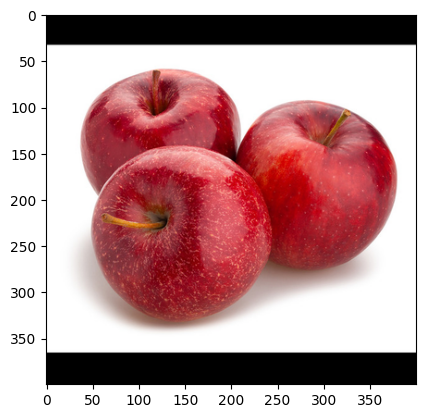

265 190
(400, 400)


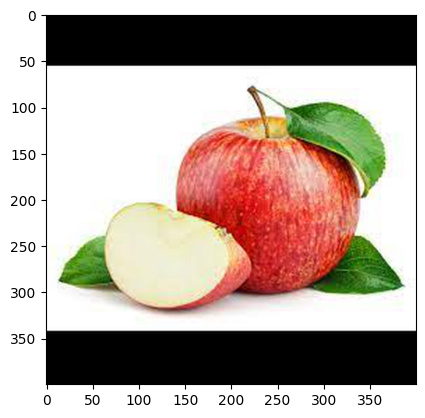

450 450
(400, 400)


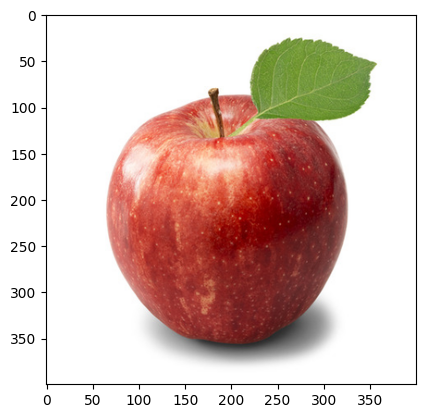

658 438
(400, 400)


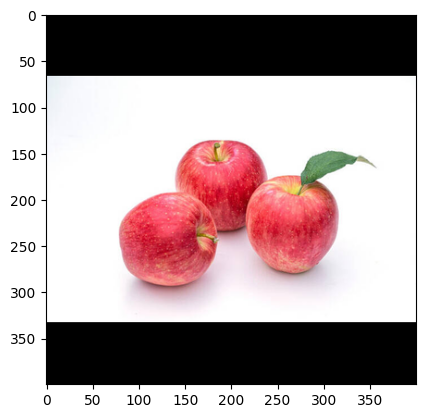

612 612
(400, 400)


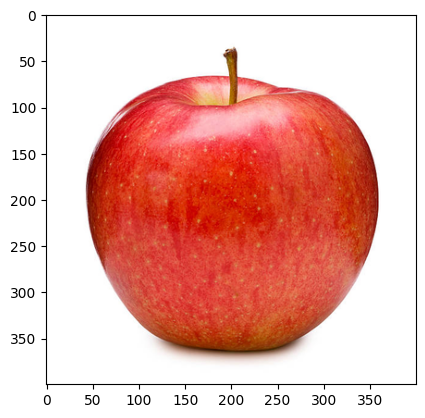

650 650
(400, 400)


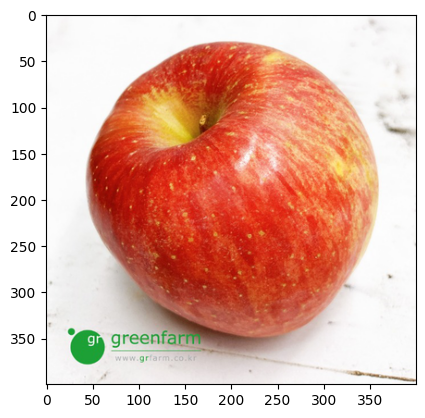

In [2]:
def get_img_path(root_path) :
    file_paths = []
    for (path, dir, files) in os.walk(root_path) :
        for file in files :
            ext = os.path.splitext(file)[-1].lower()
            formats_list = ['.bmp', '.jpg', '.jpeg', '.png', '.tif', '.gif', '.dng', '.tiff']
            if ext in formats_list : 
                file_path = os.path.join(path, file)
                file_paths.append(file_path)
    return file_paths
            
def expend2square(pil_img, background_color) : 
    width, height = pil_img.size
    print(width,height)
    
    # 정사각형 
    if width == height :
        return pil_img 
    
    # 너비가 높이보다 큰경우 처리하는 코드 
    elif width > height : 
        result = Image.new(pil_img.mode, (width,width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else :
        result = Image.new(pil_img.mode, (height,height), background_color)
        result.paste(pil_img, (0, (width - height) // 2, 0))
        return result
    
def resize_with_padding(pil_img, new_size, background_color) :
    img = expend2square(pil_img, background_color)
    img = img.resize((new_size[0], new_size[1]), Image.ANTIALIAS)
    return img

img_dir = './image/'
file_paths = get_img_path(img_dir)
for file in file_paths :
    img = Image.open(file)
    img_new = resize_with_padding(img, (400,400), (0,0,0))
    print(img_new.size)                     
    img_new.save(file)
    plt.imshow(img_new)
    plt.show()